# 1. load drive and install and load dependencies

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 5.3 MB/s 
     |████████████████████████████████| 1.7 MB 41.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 53.7 MB/s 
     |████████████████████████████████| 167 kB 48.9 MB/s 
     |████████████████████████████████| 6.8 MB 59.7 MB/s 
     |████████████████████████████████| 1.3 MB 45.4 MB/s 
     |████████████████████████████████| 261 kB 58.1 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 271 kB 54.0 MB/s 
     |████████████████████████████████| 16.9 MB 91 kB/s 
     |████████████████████████████████| 113 kB 50.7 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 675 kB 58.7 MB/s 
     |████████████████████████████████| 3.1 MB 49.2 MB/s 
     |███████████████████

In [ ]:
!pip install scanpy

     |████████████████████████████████| 2.0 MB 5.4 MB/s 
     |████████████████████████████████| 127 kB 54.1 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=e3c1562fa9aa783d79f89f455fcda2f356f84fd8ab77aa6ceabf15fae5b0e781
  Stored in directory: /root/.cache/pip/wheels/68/ca/56/344d532fe53e855ccd6549795d370588ab8123907eecf4cf30
Successfully built sinfo


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

# 2. import data

In [ ]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/pca_data.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/pca_data.zip
  inflating: pca_data.csv            


In [ ]:
df = pd.read_csv('pca_data.csv')
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,cell_state
0,GSM3148575_AAACCTGAGCAGACTG,6.918734,-5.430524,-5.934304,-5.132598,1.257261,-4.486886,-0.617733,-0.260068,-1.264563,3.596646,2.086040,1.914667,4.873919,-0.369806,-0.925603,1.311917,0.925094,0.120551,1.124421,1.906007,1.226803,0.643076,2.262795,1.109645,-0.190924,2.457812,-2.650853,0.281783,-1.228190,1.024622,-0.403749,0.395911,-0.134256,-1.001416,2.710131,2.867136,-0.052171,-1.017120,0.970193,1.078939,0.763181,-0.974815,0.304716,2.475712,-0.227740,1.089021,-1.379492,-1.724489,0.727861,0.959556,CD8 exhausted T-cell (unspecified)
1,GSM3148575_AAACCTGAGGTCGGAT,6.481100,5.917336,-1.208722,0.790335,-5.729861,-0.235486,-0.798798,-1.673697,0.992981,2.014384,1.197686,3.126476,2.299061,-1.529358,0.477961,-1.135993,2.339923,0.873401,0.002629,1.755137,-1.014675,1.753415,-0.149313,-0.458066,-0.796815,-1.306341,-0.335694,-0.160202,-0.239191,-0.679422,0.199933,-0.826625,-1.970399,-0.613103,-0.389284,-1.541020,0.195096,-0.834788,-1.085860,0.075480,-0.421840,-1.777539,1.433072,0.176093,0.292241,0.198317,-1.676759,-1.558137,0.503436,-0.545312,CD8 T-cell (unspecified)
2,GSM3148575_AAACCTGAGTGTACCT,5.788861,6.837175,-0.887075,5.646618,0.523669,-1.265495,-2.007347,-2.527674,0.265183,-1.956149,-1.198070,0.801297,-0.911915,-0.998997,-2.779241,-2.369006,1.254288,1.719373,0.718629,-0.177771,-0.804413,1.009628,1.237071,1.228712,0.633373,1.198361,-0.295055,-0.885894,1.111512,0.941895,0.721014,-1.297449,0.190606,0.974933,-0.546057,0.631332,-0.102032,-1.091253,-1.079537,-0.659000,-1.234536,-1.315012,-0.349012,0.262349,2.020753,1.190537,0.790291,0.088697,-1.158267,-0.190613,CD4 regulatory T-cell (unspecified)
3,GSM3148575_AAACCTGAGTGTACTC,5.108254,-7.165000,-8.003197,-6.768706,3.072275,-2.210504,-0.178368,1.110728,3.006974,-1.685400,1.482924,0.795629,3.881558,-0.393929,-0.862719,3.387931,0.666578,-2.843199,1.042368,4.187947,-0.359032,0.731889,0.669591,3.103710,-1.950703,1.757820,-2.452799,0.704643,-2.356638,1.939687,1.132096,0.551286,-1.746684,0.092801,1.380779,-1.638370,-1.705521,-0.729765,2.299366,1.412258,1.045634,1.368334,1.171300,1.354746,-1.115841,0.397382,-0.240331,-0.744143,-0.891667,0.930065,CD8 exhausted T-cell (unspecified)
4,GSM3148575_AAACCTGCAACACCCG,11.084245,1.923271,-1.023140,8.029376,-2.299359,2.284066,-6.615127,-2.620251,-4.312167,0.839962,-0.770186,0.829490,2.489371,-1.581365,0.143728,1.558536,2.591930,1.499460,-0.846908,-0.946084,0.991319,0.979579,0.593032,3.374414,0.504460,0.188853,-0.415865,-1.216265,-0.532730,0.123159,0.259860,-1.989235,-0.896384,-0.197704,1.172842,1.311405,1.824415,0.998337,-1.210659,0.074916,-2.456988,-1.737955,-2.472423,-2.025937,1.706594,-0.141557,0.035906,1.043848,-0.449964,0.860397,CD4 naive T-cell


In [ ]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip
  inflating: subset_30.csv           


In [ ]:
df_30 = pd.read_csv('subset_30.csv', index_col = 0)

## add cell_type column

In [ ]:
category_dict = {
   'CD4 naive T-cell': 'T-cell',
   'CD4 regulatory T-cell (unspecified)': 'T-cell',
   'CD8 effector memory T-cell': 'T-cell',
   'CD4 helper T-cell (unspecified)': 'T-cell',
   'CD8 memory T-cell (unspecified)': 'T-cell',
   'CD4 follicular helper T-cell': 'T-cell',
   'CD8 T-cell (unspecified)': 'T-cell',
   'CD8 resident memory T-cell': 'T-cell',
   'B-cell (unspecified)': 'B-cell',
   'CD8 activated T-cell (unspecified)': 'T-cell',
   'macrophage': 'macrophage',
   'plasma cell': 'plasma cell',
   'CD8 exhausted T-cell (unspecified)': 'T-cell',
   'natural killer cell': 'killer cell',
   'CD8 exhausted resident memory T-cell': 'T-cell',
   'NK T-cell (unspecified)': 'T-cell',
   'Th17 T-cell': 'T-cell',
   'M2 macrophage': 'macrophage',
   'CD8 cytotoxic T-cell (unspecified)': 'T-cell',
   'classical monocyte': 'monocyte',
   'CD4 T-cell (unspecified)': 'T-cell',
   'GC-dependent memory B-cell': 'B-cell',
   'T-cell (unspecified)': 'T-cell',
   'non-classical monocyte': 'monocyte',
   'lymphocyte': 'lymphocyte',
   'naive B-cell': 'B-cell',
   'granulocyte': 'granulocyte',
   'conventional dendritic cell': 'dendritic cell',
   'CD8 exhausted cytotoxic T-cell (unspecified)': 'T-cell',
   'mast cell': 'mast cell',
   'conventional dendritic cell 2': 'dendritic cell',
   'plasmacytoid dendritic cell': 'dendritic cell',
   'dendritic cell': 'dendritic cell',
   'CD8 naive T-cell': 'T-cell',
   'leukocyte': 'leukocyte',
   'M1 macrophage': 'macrophage',
   'perivascular M2 macrophage': 'macrophage',
   'myeloid cell (unspecified)': 'myeloid cell',
   'CD4 central memory T-cell': 'T-cell',
   'GC-independent memory B-cell': 'B-cell',
   'CD8 central memory T-cell': 'T-cell',
   'conventional dendritic cell 1': 'dendritic cell',
   'gd T-cell (unspecified)': 'T-cell'
}

In [ ]:
df['cell_type'] = df['cell_state'].apply(lambda cell: category_dict[cell])
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,cell_state,cell_type
0,GSM3148575_AAACCTGAGCAGACTG,6.918734,-5.430524,-5.934304,-5.132598,1.257261,-4.486886,-0.617733,-0.260068,-1.264563,3.596646,2.086040,1.914667,4.873919,-0.369806,-0.925603,1.311917,0.925094,0.120551,1.124421,1.906007,1.226803,0.643076,2.262795,1.109645,-0.190924,2.457812,-2.650853,0.281783,-1.228190,1.024622,-0.403749,0.395911,-0.134256,-1.001416,2.710131,2.867136,-0.052171,-1.017120,0.970193,1.078939,0.763181,-0.974815,0.304716,2.475712,-0.227740,1.089021,-1.379492,-1.724489,0.727861,0.959556,CD8 exhausted T-cell (unspecified),T-cell
1,GSM3148575_AAACCTGAGGTCGGAT,6.481100,5.917336,-1.208722,0.790335,-5.729861,-0.235486,-0.798798,-1.673697,0.992981,2.014384,1.197686,3.126476,2.299061,-1.529358,0.477961,-1.135993,2.339923,0.873401,0.002629,1.755137,-1.014675,1.753415,-0.149313,-0.458066,-0.796815,-1.306341,-0.335694,-0.160202,-0.239191,-0.679422,0.199933,-0.826625,-1.970399,-0.613103,-0.389284,-1.541020,0.195096,-0.834788,-1.085860,0.075480,-0.421840,-1.777539,1.433072,0.176093,0.292241,0.198317,-1.676759,-1.558137,0.503436,-0.545312,CD8 T-cell (unspecified),T-cell
2,GSM3148575_AAACCTGAGTGTACCT,5.788861,6.837175,-0.887075,5.646618,0.523669,-1.265495,-2.007347,-2.527674,0.265183,-1.956149,-1.198070,0.801297,-0.911915,-0.998997,-2.779241,-2.369006,1.254288,1.719373,0.718629,-0.177771,-0.804413,1.009628,1.237071,1.228712,0.633373,1.198361,-0.295055,-0.885894,1.111512,0.941895,0.721014,-1.297449,0.190606,0.974933,-0.546057,0.631332,-0.102032,-1.091253,-1.079537,-0.659000,-1.234536,-1.315012,-0.349012,0.262349,2.020753,1.190537,0.790291,0.088697,-1.158267,-0.190613,CD4 regulatory T-cell (unspecified),T-cell
3,GSM3148575_AAACCTGAGTGTACTC,5.108254,-7.165000,-8.003197,-6.768706,3.072275,-2.210504,-0.178368,1.110728,3.006974,-1.685400,1.482924,0.795629,3.881558,-0.393929,-0.862719,3.387931,0.666578,-2.843199,1.042368,4.187947,-0.359032,0.731889,0.669591,3.103710,-1.950703,1.757820,-2.452799,0.704643,-2.356638,1.939687,1.132096,0.551286,-1.746684,0.092801,1.380779,-1.638370,-1.705521,-0.729765,2.299366,1.412258,1.045634,1.368334,1.171300,1.354746,-1.115841,0.397382,-0.240331,-0.744143,-0.891667,0.930065,CD8 exhausted T-cell (unspecified),T-cell
4,GSM3148575_AAACCTGCAACACCCG,11.084245,1.923271,-1.023140,8.029376,-2.299359,2.284066,-6.615127,-2.620251,-4.312167,0.839962,-0.770186,0.829490,2.489371,-1.581365,0.143728,1.558536,2.591930,1.499460,-0.846908,-0.946084,0.991319,0.979579,0.593032,3.374414,0.504460,0.188853,-0.415865,-1.216265,-0.532730,0.123159,0.259860,-1.989235,-0.896384,-0.197704,1.172842,1.311405,1.824415,0.998337,-1.210659,0.074916,-2.456988,-1.737955,-2.472423,-2.025937,1.706594,-0.141557,0.035906,1.043848,-0.449964,0.860397,CD4 naive T-cell,T-cell


In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_type'].value_counts()}), pd.DataFrame({'percentage': df['cell_type'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
T-cell,83066,0.765416
B-cell,7084,0.065276
macrophage,6126,0.056448
plasma cell,3073,0.028316
killer cell,2593,0.023893
monocyte,2089,0.019249
dendritic cell,1995,0.018383
lymphocyte,884,0.008146
granulocyte,800,0.007372
mast cell,505,0.004653


# Split data into train and test

In [ ]:
cells = df_30.index
cells

Index(['GSM3721462_TTAACTCGTGGTCCGT', 'ERS3566166_TTAGGACGTATCGCAT',
       'GSM4143657_GTATTCTGTGGCGAAT', 'GSM3511757_TTGACTTCAAACAACA',
       'GSM4143657_GCGGGTTCAGAAGCAC', 'ERS3858523_GTTTCTAGTCAACTGT',
       'ERS3858523_TCAACGATCTTACCGC', 'GSM3148579_GATTCAGAGAAGGTTT',
       'GSM3721449_AGAGCGATCTCGTATT', 'GSM3148579_CTGCCTAAGAGGGATA',
       ...
       'GSM3511752_ACATGGTTCCACTGGG', 'GSM3511756_GTGTTAGGTACTTCTT',
       'GSM3721449_TGAGCCGTCTGCAAGT', 'SRR6737171_CGTGAGCTCAAGCCTA',
       'GSM3148578_CACATAGTCAGGATCT', 'GSM3511757_GAACGGAGTAAAGGAG',
       'ERS2657940_CACCAGGGTTCAGTAC', 'GSM3721455_TCTCTAACAGCCAATT',
       'GSM3721462_TATGCCCTCGAACGGA', 'GSM3148575_AAGCCGCTCTGGTATG'],
      dtype='object', name='Unnamed: 0', length=32557)

In [ ]:
df_test = df[df['Unnamed: 0'].isin(cells)]
df_test = df_test.set_index('Unnamed: 0')
df_test = df_test.reindex(df_30.index)
len(df_test)

32557

In [ ]:
df_train = df[~df['Unnamed: 0'].isin(cells)]
df_train = df_train.set_index('Unnamed: 0')
df_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,cell_state,cell_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3148575_AAACCTGAGGTCGGAT,6.481100,5.917336,-1.208722,0.790335,-5.729861,-0.235486,-0.798798,-1.673697,0.992981,2.014384,1.197686,3.126476,2.299061,-1.529358,0.477961,-1.135993,2.339923,0.873401,0.002629,1.755137,-1.014675,1.753415,-0.149313,-0.458066,-0.796815,-1.306341,-0.335694,-0.160202,-0.239191,-0.679422,0.199933,-0.826625,-1.970399,-0.613103,-0.389284,-1.541020,0.195096,-0.834788,-1.085860,0.075480,-0.421840,-1.777539,1.433072,0.176093,0.292241,0.198317,-1.676759,-1.558137,0.503436,-0.545312,CD8 T-cell (unspecified),T-cell
GSM3148575_AAACCTGCAACACCCG,11.084245,1.923271,-1.023140,8.029376,-2.299359,2.284066,-6.615127,-2.620251,-4.312167,0.839962,-0.770186,0.829490,2.489371,-1.581365,0.143728,1.558536,2.591930,1.499460,-0.846908,-0.946084,0.991319,0.979579,0.593032,3.374414,0.504460,0.188853,-0.415865,-1.216265,-0.532730,0.123159,0.259860,-1.989235,-0.896384,-0.197704,1.172842,1.311405,1.824415,0.998337,-1.210659,0.074916,-2.456988,-1.737955,-2.472423,-2.025937,1.706594,-0.141557,0.035906,1.043848,-0.449964,0.860397,CD4 naive T-cell,T-cell
GSM3148575_AAACCTGCACCCATGG,7.670421,0.558138,1.386510,-5.014564,-0.916848,0.064384,2.082932,-0.442803,-1.710666,1.037410,0.580227,7.602390,1.878071,-2.948012,-0.675660,0.623930,-0.578028,-1.090966,0.994528,0.077175,-1.795574,-1.894433,-1.132679,-0.039605,0.989742,-1.649795,-2.109513,-0.675437,0.345807,-0.791065,3.348352,-2.107793,1.774473,2.361114,0.119093,0.250036,-1.536456,-1.223522,0.738385,3.377066,3.474761,0.690107,-0.166768,-1.508768,-0.039762,2.174355,-0.361345,0.437573,-2.181939,1.047686,CD8 activated T-cell (unspecified),T-cell
GSM3148575_AAACCTGCAGATGGGT,9.455652,-0.826634,-2.874930,-2.113662,-3.168251,-1.550202,-0.169521,-0.266947,-0.066584,-1.110948,-1.196856,3.516318,2.060829,-0.839665,-1.123929,1.488965,1.368439,-0.639098,-1.935935,1.010560,-1.126551,0.549937,1.724352,2.734371,-0.021184,-1.898747,-1.551696,0.148557,-0.638644,0.203681,1.293199,-0.147220,-1.369936,0.994730,-1.465007,-1.002224,-1.972965,-1.887828,0.874359,-1.302596,1.009539,0.099289,0.231540,0.196670,2.028239,1.694075,-0.096951,1.014447,-0.855859,0.925869,CD8 activated T-cell (unspecified),T-cell
GSM3148575_AAACCTGGTAGCACGA,7.353897,3.243777,-3.619241,-1.479285,-2.319161,-3.325617,-4.206104,-1.276288,0.867641,0.274128,1.748696,4.530429,1.858074,0.307401,-0.719360,1.286166,0.644445,-0.597322,-1.247165,-0.090605,-0.649750,-0.782044,2.747107,0.429720,0.246257,-0.952055,-0.222972,-0.101803,0.467913,0.269655,0.674930,0.666954,2.175464,0.638669,0.077923,-0.161295,-1.882192,-1.129995,1.547552,-1.158150,0.465009,0.291262,-0.398701,2.744586,1.778461,-0.249094,0.478467,0.492101,-1.251888,1.082389,CD8 effector memory T-cell,T-cell


# Overview Models Cell Type

## Split data

In [ ]:
X_train = df_train.drop(columns=['cell_state', 'cell_type'])
y_train = df_train['cell_type']

## Overview

In [ ]:
from pycaret.classification import *

reg = setup(data=pd.concat([X_train, y_train], axis=1), 
            target = 'cell_type', 
            session_id=13, 
            log_experiment=True, 
            experiment_name='idorsia1') # 8min

,Description,Value
0,session_id,13
1,Target,cell_type
2,Target Type,Multiclass
3,Label Encoded,"B-cell: 0, T-cell: 1, dendritic cell: 2, granu..."
4,Original Data,"(75967, 51)"
5,Missing Values,False
6,Numeric Features,50
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models(fold=5) #1h

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9646,0.9878,0.7374,0.9632,0.9630,0.9106,0.9109,29.740
lr,Logistic Regression,0.9587,0.9941,0.7209,0.9557,0.9562,0.8951,0.8955,25.926
rf,Random Forest Classifier,0.9564,0.9935,0.6284,0.9541,0.9500,0.8867,0.8885,26.540
et,Extra Trees Classifier,0.9549,0.9941,0.6114,0.9528,0.9470,0.8822,0.8845,3.772
gbc,Gradient Boosting Classifier,0.9539,0.9915,0.6677,0.9509,0.9514,0.8826,0.8831,509.616
svm,SVM - Linear Kernel,0.9386,0.0000,0.6159,0.9330,0.9332,0.8372,0.8406,2.130
ridge,Ridge Classifier,0.9347,0.0000,0.5161,0.9168,0.9214,0.8252,0.8299,0.076
lda,Linear Discriminant Analysis,0.9285,0.9876,0.7448,0.9449,0.9354,0.8266,0.8273,0.742
dt,Decision Tree Classifier,0.9255,0.9257,0.6318,0.9263,0.9258,0.8152,0.8153,4.986
nb,Naive Bayes,0.9189,0.9853,0.7610,0.9388,0.9273,0.8061,0.8073,0.132


# Linear Regression 43 classes

In [ ]:
# split data
X_train = df_train.drop(columns=['cell_state', 'cell_type'])
y_train = df_train['cell_state']
X_test = df_test.drop(columns=['cell_state', 'cell_type'])
y_test = df_test['cell_state']

## train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_43classes_pca.sav'
joblib.dump(lr, filename)

['lr_model_43classes_pca.sav']

## Evaluate Model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of Decision Tree model : ', acc_lr)
print('F1 weighted of Decision Tree model : ', f1_lr)
print('F1 macro of Decision Tree model : ', f1_lr_macro)

Accuracy of Decision Tree model :  74.54
F1 weighted of Decision Tree model :  73.77
F1 macro of Decision Tree model :  61.68


In [ ]:
pd.DataFrame(y_pred).to_csv('prediction_pca_43classes.csv', index=False)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                              precision    recall  f1-score   support

                        B-cell (unspecified)       0.81      0.87      0.84      1528
                    CD4 T-cell (unspecified)       0.23      0.09      0.13       334
                   CD4 central memory T-cell       0.27      0.10      0.15        30
                CD4 follicular helper T-cell       0.85      0.86      0.86      2067
             CD4 helper T-cell (unspecified)       0.63      0.72      0.67      2371
                            CD4 naive T-cell       0.76      0.84      0.80      3433
         CD4 regulatory T-cell (unspecified)       0.90      0.89      0.89      3420
                    CD8 T-cell (unspecified)       0.50      0.35      0.41      1670
          CD8 activated T-cell (unspecified)       0.67      0.65      0.66      1458
                   CD8 central memory T-cell       0.00      0.00      0.00        17
          CD8 cytotoxic T-cell (unspecified)       0.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1335,    0,    0, ...,    0,   15,    0],
       [   3,   31,    0, ...,    0,    0,    0],
       [   0,    0,    3, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    8,    0,    0],
       [  10,    1,    0, ...,    0,  859,    0],
       [   0,    0,    0, ...,    0,    0,  111]])

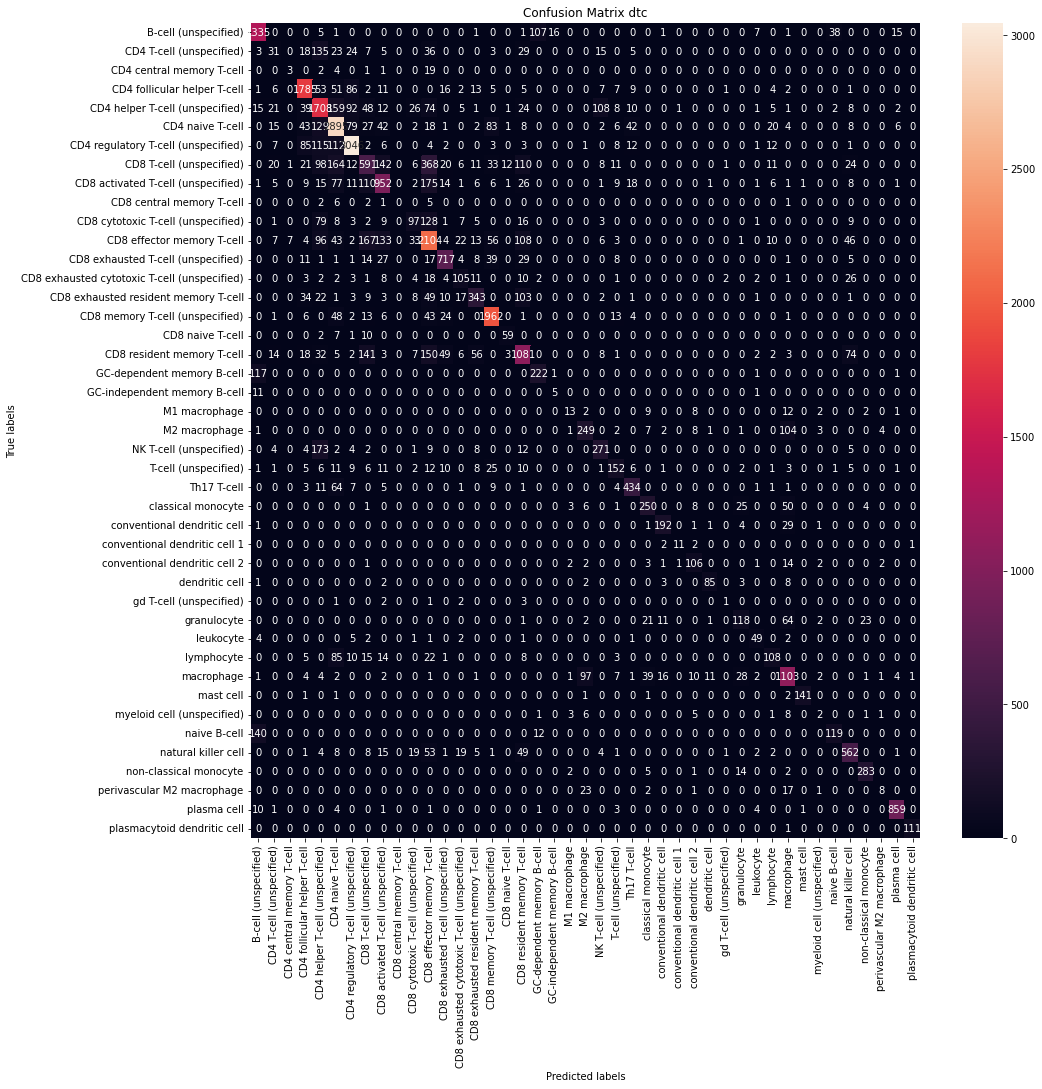

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()